# Lazy PCG

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import check_grad, approx_fprime
import torch
# import numdifftools as nd

/shared-libs/python3.7/py/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# !pip install numdifftools

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
nbox = 2
mdim = 10

In [ ]:
Z = np.ones(shape=(nbox, 1))
A = np.ones(shape=(nbox, nbox))
m = np.ones(shape=(nbox, 1))

SyntaxError: invalid syntax (2351045352.py, line 2)

In [ ]:
np.concatenate((Z, m), axis=None)

array([1., 1., 1., 1.])

In [ ]:
def simple_converge_check(f):
    return True

def simple_smooth_check(f):
    return True

In [ ]:
# Simple testing covex function
def f(x):
    """
    A: data record vector
    x: parameter vector
    """
    A = np.array([8.1, 1.4])
    A = np.expand_dims(A, axis=1)
    y = x - A
    # [x1 - 8.1, x2 - 1.4]
    dot_product = np.dot(y.T,  y)
    # (x1 - 8.1)^2 + (x2 - 1.4)^2 >= 0 => optimal point: x1 = 8.1 and x2 = 1.4
    return dot_product[0, 0]

In [ ]:
# Gradient function of f
def grad_f(x):
    A = np.array([8.1, 1.4])
    A = np.expand_dims(A, axis=1)
    # x^2 => 2x
    # (x1 - 8.1)^2 + (x2 - 1.4)^2  => grad_x1 = 2 * (x1 - 8.1) ; grad_x2 = 2 * (x1 - 1.4)
    # grad = [2 * (x1 - 8.1), 2 * (x1 - 1.4)] 
    return 2 * (x - A)

In [ ]:
# def f(x):
#     #t1: mdim, nbox
#     t1 = np.dot(x.T, A)
#     #t2: mxim, mdim
#     t2 = np.dot(t1, x)
#     t3 = t2 - np.dot(x.T, m)
#     return t3[0,0]

# def grad_f(x):
#     # grad = nd.Gradient(f)(x)
#     grad = np.dot(x.T, A) - m.T
#     # print("grad shape {}".format(grad.T.shape))
#     return grad.T

In [ ]:
def grad_i(x):
    grad = []
    grad_x = grad_f(x)
    for i in range(x.shape[0]):
        if x[i, 0] > 0:
            grad.append(grad_x[i, 0])
        elif x[i, 0] == 0:
            grad.append(-1)
    return np.array(grad)

SyntaxError: invalid syntax (3579687155.py, line 6)

In [ ]:
# Implement Unix simplex polytope
def Unit_simplex(linear_obj, size, x):
  result = np.zeros(size)
  nzIdx = np.nonzero(x)
  if linear_obj is None:
    result[0] = 1
  else:
    i = np.argmax(linear_obj[nzIdx])
    result[i] = 1
  return result

https://math.stackexchange.com/questions/3058574/product-of-two-polytopes-is-a-polytope

https://en.wikipedia.org/wiki/Duoprism

In [ ]:
def LPSep(linear_obj, size, X, cache, acc):
  for Xs in cache:
    if np.dot(linear_obj.T, X - Xs) > acc:
      return Xs
  y = Unit_simplex(-linear_obj, size, X)
  y = np.expand_dims(y, axis=1)
  if np.dot(linear_obj.T, X - y) > acc:
    cache.append(y)
    return y
  else:
    return False

In [ ]:
def LPCG_Optimizer(initial, maxiter = 10):
    dim = len(initial)
    # intial step size
    step = 1
    # Upper bound 
    phi =1
    Xs = [initial]
    f_cache = []
    # Caching solution
    y_cache = []
    # Curvature
    C = 1
    delta = 100
    K = 1.1
    for t in range(maxiter):
        phi = (2*phi + step **2 * C) / (2 + step / (K * delta))
        # increasing step size
        step =  t + 2 
        #  LO on casterian product of P (PxP)
        c = np.concatenate((grad_f(Xs[-1]), - grad_i(Xs[-1])), axis=None)
        c = np.expand_dims(c, axis=1)
        cp = np.concatenate((Xs[-1], Xs[-1]), axis=None)
        cp = np.expand_dims(cp, axis=1)
        # vertice on PxP
        v = LPSep(c, 2*dim, cp, y_cache, phi / delta)
        if isinstance(v, bool):
            Xs.append(Xs[-1])
        else:        
            v1 = v[0:dim, 0]
            v1 = np.expand_dims(v1, axis=1)
            v2 = v[dim:dim*2, 0]
            v2 = np.expand_dims(v2, axis=1)
            mus = [1 / np.power(2, eps) for eps in range(int(step)) ]
            mu = max(mus)
            X_new = Xs[-1] + mu * (v1 - v2)
            # caching
            Xs.append(X_new)
        f_cache.append(f(Xs[-1]))
    return Xs[-1], f_cache

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
def run():
  X0 = np.ones(shape=(nbox, 1))
  solution, f_cache = LPCG_Optimizer(X0, 100)
  print("solution: {}".format(solution))
  return f_cache

solution: [[8.]
 [1.]]


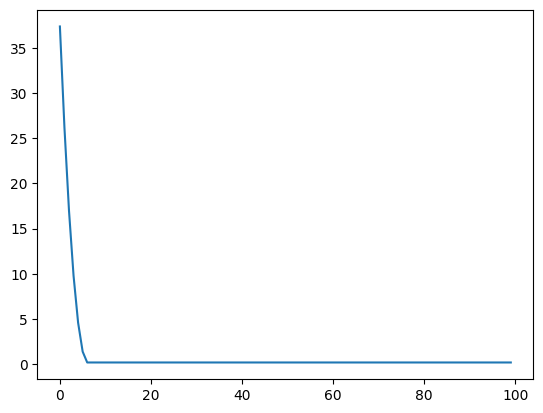

In [ ]:
logs = run()
# print(logs)
plt.plot([i for i in range(len(logs))], logs)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fac25d2-c648-4a14-a44a-55375e4c757a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>